In [1]:
import pandas as pd
import sqlalchemy
import re

In [2]:
#read each Happiness_file.csv
happiness2022_df = pd.read_csv('Resources/2022-WorldHappiness.csv')

## Happiness Data Transformation

In [3]:
happiness2022_df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [4]:
happiness2022_df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [5]:
happiness2022_df = happiness2022_df[['RANK', 'Country', 'Happiness score', 'Explained by: GDP per capita', 'Explained by: Social support']]
happiness2022_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
happiness2022_df.rename(columns = {'Happiness score':'HappinessScore_2022'}, inplace = True)
happiness2022_df

,RANK,Country,HappinessScore_2022,Explained by: GDP per capita,Explained by: Social support
0,1,Finland,7.821,1.892,1.258
1,2,Denmark,7.636,1.953,1.243
2,3,Iceland,7.557,1.936,1.320
3,4,Switzerland,7.512,2.026,1.226
4,5,Netherlands,7.415,1.945,1.206
...,...,...,...,...,...
142,143,Rwanda*,3.268,0.785,0.133
143,144,Zimbabwe,2.995,0.947,0.690
144,145,Lebanon,2.955,1.392,0.498
145,146,Afghanistan,2.404,0.758,0.000


In [6]:
happiness2021_df = pd.read_csv('Resources/2021-WorldHappiness.csv')
#happiness2021_df

In [7]:
happiness2021_df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [8]:
happiness2021_df = happiness2021_df[['Country name', 'Ladder score', 'Explained by: Log GDP per capita', 'Explained by: Social support']]
happiness2021_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
happiness2021_df.rename(columns = {'Country name':'Country', 'Ladder score':'HappinessScore_2021', 'Explained by: Log GDP per capita':'Explained by: GDP per capita'}, inplace = True)
happiness2021_df

,Country,HappinessScore_2021,Explained by: GDP per capita,Explained by: Social support
0,Finland,7.842,1.446,1.106
1,Denmark,7.620,1.502,1.108
2,Switzerland,7.571,1.566,1.079
3,Iceland,7.554,1.482,1.172
4,Netherlands,7.464,1.501,1.079
...,...,...,...,...
144,Lesotho,3.512,0.451,0.731
145,Botswana,3.467,1.099,0.724
146,Rwanda,3.415,0.364,0.202
147,Zimbabwe,3.145,0.457,0.649


In [9]:
happiness2020_df = pd.read_csv('Resources/2020-WorldHappiness.csv')
#happiness2020_df

In [10]:
happiness2020_df = happiness2020_df[['Country name', 'Ladder score', 'Explained by: Log GDP per capita', 'Explained by: Social support']]
happiness2020_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
happiness2020_df.rename(columns = {'Country name':'Country', 'Ladder score':'HappinessScore_2020', 'Explained by: Log GDP per capita':'Explained by: GDP per capita'}, inplace = True)
happiness2020_df

,Country,HappinessScore_2020,Explained by: GDP per capita,Explained by: Social support
0,Finland,7.8087,1.285190,1.499526
1,Denmark,7.6456,1.326949,1.503449
2,Switzerland,7.5599,1.390774,1.472403
3,Iceland,7.5045,1.326502,1.547567
4,Norway,7.4880,1.424207,1.495173
...,...,...,...,...
148,Central African Republic,3.4759,0.041072,0.000000
149,Rwanda,3.3123,0.343243,0.522876
150,Zimbabwe,3.2992,0.425564,1.047835
151,South Sudan,2.8166,0.289083,0.553279


In [11]:
happiness_factor2020_df = happiness2020_df[['Country', 'HappinessScore_2020']]
happiness_factor2020_df

,Country,HappinessScore_2020
0,Finland,7.8087
1,Denmark,7.6456
2,Switzerland,7.5599
3,Iceland,7.5045
4,Norway,7.4880
...,...,...
148,Central African Republic,3.4759
149,Rwanda,3.3123
150,Zimbabwe,3.2992
151,South Sudan,2.8166


In [12]:
happiness_factor2021_df = happiness2021_df[['Country', 'HappinessScore_2021']]
happiness_factor2021_df

,Country,HappinessScore_2021
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
...,...,...
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145


In [13]:
happiness_factor2022_df = happiness2022_df[['Country', 'HappinessScore_2022']]
happiness_factor2022_df

,Country,HappinessScore_2022
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415
...,...,...
142,Rwanda*,3.268
143,Zimbabwe,2.995
144,Lebanon,2.955
145,Afghanistan,2.404


In [14]:
dfs = [happiness_factor2020_df, happiness_factor2021_df, happiness_factor2022_df]
dfs = [df.set_index('Country') for df in dfs]
combined_happiness_df = dfs[0].join(dfs[1:])
combined_happiness_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
combined_happiness_df.reset_index(inplace = True)

In [15]:
combined_happiness_df.head()

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022
0,Finland,7.8087,7.842,7.821
1,Denmark,7.6456,7.620,7.636
2,Switzerland,7.5599,7.571,7.512
3,Iceland,7.5045,7.554,7.557
4,Norway,7.4880,7.392,7.365


## Covid data transformation

In [16]:
COVID_df = pd.read_csv("Resources/WHO-COVID-19-global-data.csv")

In [17]:
COVID_df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [18]:
COVID_df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [19]:
COVID_df.dtypes

Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [20]:
COVID2020_df = COVID_df.loc[COVID_df['Date_reported'] == '2020-12-31', COVID_df.columns[2:]]
COVID2020_df = COVID2020_df[['Country', 'Cumulative_deaths']].copy().reset_index(drop=True)
COVID2020_df.rename(columns = {'Cumulative_deaths':'Deaths_2020'}, inplace = True)
COVID2020_df.head()

,Country,Deaths_2020
0,Afghanistan,2189
1,Albania,1174
2,Algeria,2751
3,American Samoa,0
4,Andorra,84


In [21]:
COVID2021_df = COVID_df.loc[COVID_df['Date_reported'] == '2021-12-31', COVID_df.columns[2:]]
COVID2021_df = COVID2021_df[['Country', 'Cumulative_deaths']].copy().reset_index(drop=True)
COVID2021_df.rename(columns = {'Cumulative_deaths':'Deaths_2021'}, inplace = True)
COVID2021_df.head()

,Country,Deaths_2021
0,Afghanistan,7356
1,Albania,3215
2,Algeria,6271
3,American Samoa,0
4,Andorra,140


In [22]:
COVID2021_df = COVID2021_df.assign(Deaths_2021 = COVID2021_df['Deaths_2021'] - COVID2020_df['Deaths_2020'])

In [23]:
COVID2021_df

,Country,Deaths_2021
0,Afghanistan,5167
1,Albania,2041
2,Algeria,3520
3,American Samoa,0
4,Andorra,56
...,...,...
232,Viet Nam,32133
233,Wallis and Futuna,7
234,Yemen,1373
235,Zambia,3344


In [24]:
COVID2022_df = COVID_df.loc[COVID_df['Date_reported'] == '2022-03-31', COVID_df.columns[2:]]
COVID2022_df = COVID2022_df[['Country', 'Cumulative_deaths']].copy().reset_index(drop=True)
COVID2022_df.rename(columns = {'Cumulative_deaths':'Deaths_2022'}, inplace = True)
COVID2022_df.head()

,Country,Deaths_2022
0,Afghanistan,7665
1,Albania,3492
2,Algeria,6874
3,American Samoa,4
4,Andorra,153


In [25]:
COVID2022_df = COVID2022_df.assign(Deaths_2022 = COVID2022_df['Deaths_2022'] - COVID2021_df['Deaths_2021'])

In [26]:
COVID2022_df

,Country,Deaths_2022
0,Afghanistan,2498
1,Albania,1451
2,Algeria,3354
3,American Samoa,4
4,Andorra,97
...,...,...
232,Viet Nam,10321
233,Wallis and Futuna,0
234,Yemen,770
235,Zambia,622


In [27]:
#Merge both tables
merged2_df = pd.merge(COVID2020_df, COVID2021_df, on = 'Country', how ="inner")
COVID_merged_df = pd.merge(merged2_df, COVID2022_df, on ='Country', how = "inner")
COVID_merged_df

,Country,Deaths_2020,Deaths_2021,Deaths_2022
0,Afghanistan,2189,5167,2498
1,Albania,1174,2041,1451
2,Algeria,2751,3520,3354
3,American Samoa,0,0,4
4,Andorra,84,56,97
...,...,...,...,...
232,Viet Nam,35,32133,10321
233,Wallis and Futuna,0,7,0
234,Yemen,611,1373,770
235,Zambia,386,3344,622


## Clean the country name

In [28]:
COVID_Cleaned = COVID_merged_df["Country"].str.replace('[^\w\s]', '', regex = True)
COVID_Cleaned = COVID_merged_df["Country"].str.strip()
COVID_merged_df["Country"] = COVID_Cleaned

In [29]:
COVID_merged_df.head()

,Country,Deaths_2020,Deaths_2021,Deaths_2022
0,Afghanistan,2189,5167,2498
1,Albania,1174,2041,1451
2,Algeria,2751,3520,3354
3,American Samoa,0,0,4
4,Andorra,84,56,97


In [30]:
Happiness_Cleaned = combined_happiness_df["Country"].str.replace('[^\w\s]', '', regex = True)
Happiness_Cleaned = combined_happiness_df["Country"].str.strip()
combined_happiness_df["Country"] = Happiness_Cleaned

In [31]:
combined_happiness_df.head()

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022
0,Finland,7.8087,7.842,7.821
1,Denmark,7.6456,7.620,7.636
2,Switzerland,7.5599,7.571,7.512
3,Iceland,7.5045,7.554,7.557
4,Norway,7.4880,7.392,7.365


## Clean the country names via converter

In [39]:
!pip install country_converter --upgrade
import country_converter as coco

     |████████████████████████████████| 50 kB 4.1 MB/s eta 0:00:01
  Created wheel for country-converter: filename=country_converter-0.7.4-py3-none-any.whl size=53543 sha256=9d07e99f6474b7fa7cfb5ec55f9e02946e547474015e3c6e4c740c5f440dabc0
  Stored in directory: /Users/jsacharz/Library/Caches/pip/wheels/d7/24/15/9aea58c388c3cb8c90968438c44267db6dcbac491b7b38a77b
Successfully built country-converter


In [41]:
#Example of use
some_names = ['United Rep. of Tanzania', 'DE', 'Cape Verde', '788', 'Burma', 'COG',
              'Iran (Islamic Republic of)', 'Korea, Republic of',
              "Dem. People's Rep. of Korea"]
standard_names = coco.convert(names=some_names, to='name_short')
print(standard_names)

['Tanzania', 'Germany', 'Cabo Verde', 'Tunisia', 'Myanmar', 'Congo Republic', 'Iran', 'South Korea', 'North Korea']


In [42]:
#Covid data country change
Country_Covid = COVID_merged_df["Country"].values.tolist()

In [43]:
Country_Covid_Name = coco.convert(names=Country_Covid, to='name_short')
Country_Covid_Name

Bonaire not found in regex
Other not found in regex
Saba not found in regex
Sint Eustatius not found in regex


['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'not found',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo Republic',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'North Korea',
 'DR Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands',
 'Faeroe 

In [44]:
COVID_merged_df["Country"] = Country_Covid_Name

In [45]:
COVID_merged_df

,Country,Deaths_2020,Deaths_2021,Deaths_2022
0,Afghanistan,2189,5167,2498
1,Albania,1174,2041,1451
2,Algeria,2751,3520,3354
3,American Samoa,0,0,4
4,Andorra,84,56,97
...,...,...,...,...
232,Vietnam,35,32133,10321
233,Wallis and Futuna Islands,0,7,0
234,Yemen,611,1373,770
235,Zambia,386,3344,622


In [46]:
#Happiness data
combined_happiness_data = combined_happiness_df["Country"].values.tolist()

In [47]:
combined_happiness_data = coco.convert(names=combined_happiness_data, to='name_short')
combined_happiness_data

['Finland',
 'Denmark',
 'Switzerland',
 'Iceland',
 'Norway',
 'Netherlands',
 'Sweden',
 'New Zealand',
 'Austria',
 'Luxembourg',
 'Canada',
 'Australia',
 'United Kingdom',
 'Israel',
 'Costa Rica',
 'Ireland',
 'Germany',
 'United States',
 'Czech Republic',
 'Belgium',
 'United Arab Emirates',
 'Malta',
 'France',
 'Mexico',
 'Taiwan',
 'Uruguay',
 'Saudi Arabia',
 'Spain',
 'Guatemala',
 'Italy',
 'Singapore',
 'Brazil',
 'Slovenia',
 'El Salvador',
 'Kosovo',
 'Panama',
 'Slovakia',
 'Uzbekistan',
 'Chile',
 'Bahrain',
 'Lithuania',
 'Trinidad and Tobago',
 'Poland',
 'Colombia',
 'Cyprus',
 'Nicaragua',
 'Romania',
 'Kuwait',
 'Mauritius',
 'Kazakhstan',
 'Estonia',
 'Philippines',
 'Hungary',
 'Thailand',
 'Argentina',
 'Honduras',
 'Latvia',
 'Ecuador',
 'Portugal',
 'Jamaica',
 'South Korea',
 'Japan',
 'Peru',
 'Serbia',
 'Bolivia',
 'Pakistan',
 'Paraguay',
 'Dominican Republic',
 'Bosnia and Herzegovina',
 'Moldova',
 'Tajikistan',
 'Montenegro',
 'Russia',
 'Kyrgyz Repu

In [48]:
combined_happiness_df["Country"] = combined_happiness_data

In [49]:
combined_happiness_df

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022
0,Finland,7.8087,7.842,7.821
1,Denmark,7.6456,7.620,7.636
2,Switzerland,7.5599,7.571,7.512
3,Iceland,7.5045,7.554,7.557
4,Norway,7.4880,7.392,7.365
...,...,...,...,...
148,Central African Republic,3.4759,NaN,NaN
149,Rwanda,3.3123,3.415,NaN
150,Zimbabwe,3.2992,3.145,2.995
151,South Sudan,2.8166,NaN,NaN


## Merge Data

In [50]:
#merge both tables: happiness_df and COVID_merged_df
Final_data = pd.merge(combined_happiness_df, COVID_merged_df, on = "Country", how = "left")
Final_data

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0
...,...,...,...,...,...,...,...
148,Central African Republic,3.4759,NaN,NaN,63.0,38.0,75.0
149,Rwanda,3.3123,3.415,NaN,86.0,1263.0,196.0
150,Zimbabwe,3.2992,3.145,2.995,360.0,4637.0,803.0
151,South Sudan,2.8166,NaN,NaN,64.0,72.0,66.0


In [51]:
Final_data = Final_data.dropna()
Final_data

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0
...,...,...,...,...,...,...,...
143,India,3.5733,3.819,3.777,148738.0,332342.0,188787.0
144,Malawi,3.5380,3.600,3.750,189.0,2166.0,460.0
147,Tanzania,3.4762,3.623,3.702,21.0,716.0,84.0
150,Zimbabwe,3.2992,3.145,2.995,360.0,4637.0,803.0


In [52]:
Final_data.reset_index(drop = True, inplace = True)
#Final_data = Final_data.set_index("Country")

In [53]:
Final_data.head()

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0


# Analysis

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#Final_data.groupby("Country").agg({"HappinessScore_2020":"mean", "HappinessScore_2021":"mean","HappinessScore_2022":"mean"}).reset_index().sort_values(by = "HappinessScore_2020", ascending = False)
Final_data["Average_Happiness"] = Final_data[["HappinessScore_2020", "HappinessScore_2021", "HappinessScore_2022"]].mean(axis=1)
Final_data.head()

/var/folders/my/cs362p8x625fgjvlrwpy8cyh0000gn/T/ipykernel_36861/369041933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data["Average_Happiness"] = Final_data[["HappinessScore_2020", "HappinessScore_2021", "HappinessScore_2022"]].mean(axis=1)


,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022,Average_Happiness
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0,7.823900
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0,7.633867
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0,7.547633
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0,7.538500
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0,7.415000


In [48]:
Final_data["Total_Deaths"] = Final_data[["Deaths_2020","Deaths_2021","Deaths_2022"]].sum(axis=1)
Final_data.head()

/var/folders/my/cs362p8x625fgjvlrwpy8cyh0000gn/T/ipykernel_36861/3554096836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data["Total_Deaths"] = Final_data[["Deaths_2020","Deaths_2021","Deaths_2022"]].sum(axis=1)


,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022,Average_Happiness,Total_Deaths
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0,7.823900,4267.0
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0,7.633867,6975.0
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0,7.547633,20564.0
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0,7.538500,127.0
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0,7.415000,2951.0


In [49]:
Final_data.to_csv("Final_Covid_Happiness_Data.csv")

### Population numbers data

In [86]:
population_df = pd.read_csv('Resources/World_bank.csv', error_bad_lines=False)
# data = pd.read_csv("file1.csv", error_bad_lines=False)

/Users/jsacharz/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [87]:
population_df.head()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [88]:
population_df = population_df [['Country Name', "2020"]]

population_df.rename(columns = {'Country Name': 'Country', '2020':'Population'}, inplace = True)
population_df.head()

,Country,Population
0,Aruba,106766.0
1,Africa Eastern and Southern,677243299.0
2,Afghanistan,38928341.0
3,Africa Western and Central,458803476.0
4,Angola,32866268.0


In [89]:
combine_everything_df = pd.merge(Final_data, population_df, on = 'Country', how = "left")
combine_everything_df.head()

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022,Population
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0,5529543.0
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0,5831404.0
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0,8636561.0
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0,366463.0
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0,5379475.0


In [90]:
combine_everything_df['Happiness_Difference'] = combine_everything_df['HappinessScore_2022'] - combine_everything_df['HappinessScore_2020']
combine_everything_df.head()

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022,Population,Happiness_Difference
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0,5529543.0,0.0123
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0,5831404.0,-0.0096
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0,8636561.0,-0.0479
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0,366463.0,0.0525
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0,5379475.0,-0.1230


In [93]:
combine_everything_df['Total_deaths'] = combine_everything_df['Deaths_2020'] + combine_everything_df['Deaths_2021']+ combine_everything_df['Deaths_2022']
combine_everything_df.head()

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022,Population,Happiness_Difference,Total_deaths
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0,5529543.0,0.0123,4267.0
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0,5831404.0,-0.0096,6975.0
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0,8636561.0,-0.0479,20564.0
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0,366463.0,0.0525,127.0
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0,5379475.0,-0.1230,2951.0


In [95]:
combine_everything_df['Percentage_deaths'] = (combine_everything_df['Total_deaths'] / combine_everything_df['Population'])*100
combine_everything_df.head()

,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022,Population,Happiness_Difference,Total_deaths,Percentage_deaths
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0,5529543.0,0.0123,4267.0,0.077167
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0,5831404.0,-0.0096,6975.0,0.119611
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0,8636561.0,-0.0479,20564.0,0.238104
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0,366463.0,0.0525,127.0,0.034656
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0,5379475.0,-0.1230,2951.0,0.054857


In [96]:
combine_everything_df['Avarage_Happiness'] = combine_everything_df[['HappinessScore_2020', 'HappinessScore_2021', 'HappinessScore_2022']].mean(axis =1)   
combine_everything_df.head()


,Country,HappinessScore_2020,HappinessScore_2021,HappinessScore_2022,Deaths_2020,Deaths_2021,Deaths_2022,Population,Happiness_Difference,Total_deaths,Percentage_deaths,Avarage_Happiness
0,Finland,7.8087,7.842,7.821,592.0,1136.0,2539.0,5529543.0,0.0123,4267.0,0.077167,7.823900
1,Denmark,7.6456,7.620,7.636,1286.0,1979.0,3710.0,5831404.0,-0.0096,6975.0,0.119611,7.633867
2,Switzerland,7.5599,7.571,7.512,7517.0,4387.0,8660.0,8636561.0,-0.0479,20564.0,0.238104,7.547633
3,Iceland,7.5045,7.554,7.557,29.0,8.0,90.0,366463.0,0.0525,127.0,0.034656,7.538500
4,Norway,7.4880,7.392,7.365,433.0,947.0,1571.0,5379475.0,-0.1230,2951.0,0.054857,7.415000


In [97]:
combine_everything_df.columns

Index(['Country', 'HappinessScore_2020', 'HappinessScore_2021',
       'HappinessScore_2022', 'Deaths_2020', 'Deaths_2021', 'Deaths_2022',
       'Population', 'Happiness_Difference', 'Total_deaths',
       'Percentage_deaths', 'Avarage_Happiness'],
      dtype='object')

In [99]:
extracted_data_df = combine_everything_df[['Country', 
       'Happiness_Difference',
       'Percentage_deaths', 'Avarage_Happiness']]
extracted_data_df.head()

,Country,Happiness_Difference,Percentage_deaths,Avarage_Happiness
0,Finland,0.0123,0.077167,7.823900
1,Denmark,-0.0096,0.119611,7.633867
2,Switzerland,-0.0479,0.238104,7.547633
3,Iceland,0.0525,0.034656,7.538500
4,Norway,-0.1230,0.054857,7.415000


In [106]:
extracted_data_df.sort_values('Happiness_Difference', ascending=True)

,Country,Happiness_Difference,Percentage_deaths,Avarage_Happiness
94,Lebanon,-1.8165,0.171989,4.103500
59,Pakistan,-1.1773,0.018288,5.047767
75,Benin,-0.5930,0.001707,4.961333
13,Costa Rica,-0.5394,0.205021,6.924133
101,Jordan,-0.4814,0.174907,4.393467
...,...,...,...,...
68,Greece,0.4330,0.301396,5.728667
79,China,0.4611,0.001275,5.349300
105,Ukraine,0.5233,0.286600,4.839900
69,Croatia,0.6203,0.479855,5.837233


In [121]:
extracted_data_df.sort_values('Percentage_deaths', ascending=False)

,Country,Happiness_Difference,Percentage_deaths,Avarage_Happiness
56,Peru,-0.2378,0.925775,5.731933
80,Bulgaria,0.2695,0.634942,5.246167
62,Bosnia and Herzegovina,0.0939,0.602289,5.751700
46,Hungary,0.0856,0.564166,6.026133
63,Moldova,0.2495,0.554895,5.743500
...,...,...,...,...
66,Russia,-0.0870,NaN,5.494000
83,Venezuela,-0.1282,NaN,4.956733
87,Laos,0.2514,NaN,5.019533
100,Iran,0.2156,NaN,4.760467


,Country,Happiness_Difference,Percentage_deaths,Avarage_Happiness
0,Finland,0.0123,0.077167,7.823900
1,Denmark,-0.0096,0.119611,7.633867
2,Switzerland,-0.0479,0.238104,7.547633
3,Iceland,0.0525,0.034656,7.538500
4,Norway,-0.1230,0.054857,7.415000
...,...,...,...,...
115,India,0.2037,0.048541,3.723100
116,Malawi,0.2120,0.014715,3.629333
117,Tanzania,0.2258,0.001374,3.600400
118,Zimbabwe,-0.3042,0.039023,3.146400


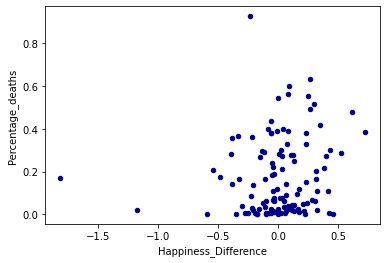

In [104]:
ax1 = extracted_data_df.plot.scatter(x='Happiness_Difference',
...                       y='Percentage_deaths',
...                       c='DarkBlue')

In [108]:
extracted_data_df.to_csv("analysis_data.csv")

In [111]:
negative_df = extracted_data_df[extracted_data_df.iloc[:, 1] < 0]
negative_df

,Country,Happiness_Difference,Percentage_deaths,Avarage_Happiness
1,Denmark,-0.0096,0.119611,7.633867
2,Switzerland,-0.0479,0.238104,7.547633
4,Norway,-0.1230,0.054857,7.415000
5,Netherlands,-0.0339,0.190660,7.442633
7,New Zealand,-0.0996,0.006373,7.258867
8,Austria,-0.1312,0.296371,7.241733
9,Canada,-0.2071,0.138932,7.120033
10,Australia,-0.0608,0.026742,7.189267
11,United Kingdom,-0.2215,0.361882,7.057167
13,Costa Rica,-0.5394,0.205021,6.924133


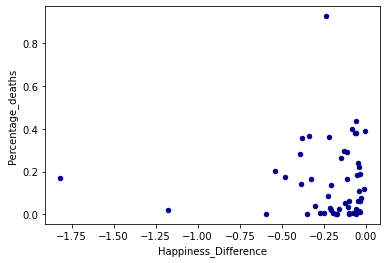

In [112]:
ax2 = negative_df.plot.scatter(x='Happiness_Difference',
...                       y='Percentage_deaths',
...                       c='DarkBlue')

In [119]:
negative_df.describe()

,Happiness_Difference,Percentage_deaths,Avarage_Happiness
count,54.000000,52.000000,54.000000
mean,-0.217950,0.154349,5.729669
std,0.295540,0.174904,1.168246
min,-1.816500,0.001707,2.497967
25%,-0.247175,0.017101,4.945258
50%,-0.125600,0.095770,5.835367
75%,-0.058350,0.245032,6.633767
max,-0.007700,0.925775,7.633867


In [117]:
positive_df = extracted_data_df[extracted_data_df.iloc[:, 1] > 0]
positive_df.sort_values('Happiness_Difference', ascending = False)

,Country,Happiness_Difference,Percentage_deaths,Avarage_Happiness
98,Armenia,0.7222,0.385930,5.119600
69,Croatia,0.6203,0.479855,5.837233
105,Ukraine,0.5233,0.286600,4.839900
79,China,0.4611,0.001275,5.349300
68,Greece,0.4330,0.301396,5.728667
...,...,...,...,...
0,Finland,0.0123,0.077167,7.823900
31,Panama,0.0042,0.280455,6.264600
74,Cote d'Ivoire,0.0017,0.003541,5.258100
65,Montenegro,0.0009,0.543532,5.558033


In [118]:
positive_df.describe()

,Happiness_Difference,Percentage_deaths,Avarage_Happiness
count,66.000000,61.000000,66.000000
mean,0.191789,0.195944,5.602651
std,0.157517,0.186600,0.938795
min,0.000600,0.001275,3.600400
25%,0.066100,0.034656,4.992092
50%,0.146400,0.116026,5.716583
75%,0.282250,0.301396,6.260175
max,0.722200,0.634942,7.823900


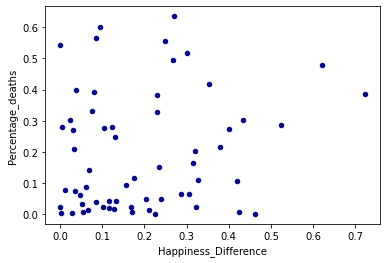

In [115]:
ax2 = positive_df.plot.scatter(x='Happiness_Difference',
...                       y='Percentage_deaths',
...                       c='DarkBlue')


In [125]:
import seaborn as sns


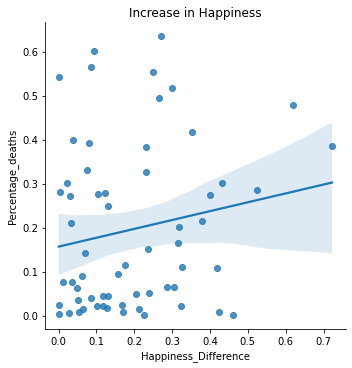

In [136]:
plot_positive = sns.lmplot(x="Happiness_Difference", y="Percentage_deaths", data= positive_df, fit_reg=True).set(title='Increase in Happiness')


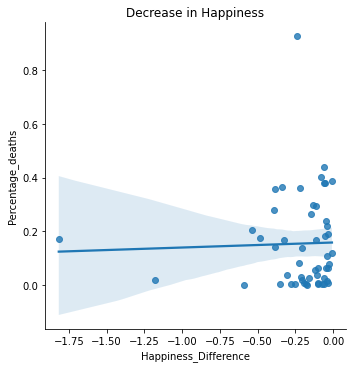

In [137]:
plot_negative = sns.lmplot(x="Happiness_Difference", y="Percentage_deaths", data= negative_df, fit_reg=True).set(title='Decrease in Happiness')

